In [48]:
# In this notebook we will read the data from 2 pressuresensors that are connected to the same hub. 
# Next we will process this data and calculate the speed of the liquid.
# Lastly we will create a virtual (speed) sensor and push virtual data to the database.

In [49]:
# Run this line if you don't have the 'requests' package installed.
# !pip3 install requests

In [50]:
# Run this line if you don't have the 'pandas' package installed.
# !pip3 install pandas

In [51]:
# Run this line if you don't have the 'matplotlib' package installed.
# !pip3 install matplotlib

In [52]:
import math 
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
# Fill in your API server ip.
serverIp = "192.168.9.225"

In [54]:
# Fill in your API server port.
serverPort = "3030"

In [55]:
url = "http://"+serverIp+":"+serverPort+"/api/v1/data"

In [56]:
# Choose the hub that includes the pressuresensors
hubId = "ESP_ARDUINO_PRESSURE"

getSpecificData = {
    "hubId": hubId,
}

In [57]:
r = requests.get(url, getSpecificData)
json = r.json()
# json

In [58]:
# sensorData is a list of dicts.
sensorData = json['data']
# sensorData

In [59]:
df = pd.DataFrame(sensorData)

# Show all columns
#df

# Show important columns
df[["hubId", "sensorId", "value", "createdAt"]]

,hubId,sensorId,value,createdAt
0,ESP_ARDUINO_PRESSURE,speedSensor_VIRTUAL,13.998800,2021-06-10T00:24:33.520Z
1,ESP_ARDUINO_PRESSURE,speedSensor_VIRTUAL,14.005485,2021-06-10T00:24:33.526Z
2,ESP_ARDUINO_PRESSURE,speedSensor_VIRTUAL,14.012102,2021-06-10T00:24:33.531Z
3,ESP_ARDUINO_PRESSURE,speedSensor_VIRTUAL,14.018340,2021-06-10T00:24:33.537Z
4,ESP_ARDUINO_PRESSURE,speedSensor_VIRTUAL,14.024529,2021-06-10T00:24:33.543Z
...,...,...,...,...
504,ESP_ARDUINO_PRESSURE,speedSensor_VIRTUAL,14.149649,2021-06-10T00:26:07.162Z
505,ESP_ARDUINO_PRESSURE,pressureSensor0,195853.550000,2021-06-10T00:26:09.778Z
506,ESP_ARDUINO_PRESSURE,pressureSensor1,101956.840000,2021-06-10T00:26:09.784Z
507,ESP_ARDUINO_PRESSURE,pressureSensor0,195945.780000,2021-06-10T00:26:14.794Z


In [60]:
# Fill from which pressureSensors you want data.
pressureSensorId_1 = "pressureSensor0"
pressureSensorId_2 = "pressureSensor1"

In [61]:
pressureSensor_1_df = df[df["sensorId"] == pressureSensorId_1]
pressureSensor_1_df.reset_index(inplace = True)

pressureSensor_2_df = df[df["sensorId"] == pressureSensorId_2]
pressureSensor_2_df.reset_index(inplace = True)

In [62]:
# Show sensor 1 df
pressureSensor_1_df

,index,_id,hubId,sensorId,value,createdAt,updatedAt,__v,extraId
0,93,60c15bc23a318400134f69c4,ESP_ARDUINO_PRESSURE,pressureSensor0,106952.99,2021-06-10T00:24:34.759Z,2021-06-10T00:24:34.759Z,0,
1,95,60c15bc73a318400134f69c6,ESP_ARDUINO_PRESSURE,pressureSensor0,107274.43,2021-06-10T00:24:39.766Z,2021-06-10T00:24:39.766Z,0,
2,97,60c15bcc3a318400134f69c8,ESP_ARDUINO_PRESSURE,pressureSensor0,107445.71,2021-06-10T00:24:44.766Z,2021-06-10T00:24:44.766Z,0,
3,208,60c15bd13a318400134f6a37,ESP_ARDUINO_PRESSURE,pressureSensor0,107702.40,2021-06-10T00:24:49.777Z,2021-06-10T00:24:49.777Z,0,
4,210,60c15bd63a318400134f6a39,ESP_ARDUINO_PRESSURE,pressureSensor0,107695.38,2021-06-10T00:24:54.763Z,2021-06-10T00:24:54.763Z,0,
5,212,60c15bdb3a318400134f6a3b,ESP_ARDUINO_PRESSURE,pressureSensor0,103087.41,2021-06-10T00:24:59.769Z,2021-06-10T00:24:59.769Z,0,
6,323,60c15be03a318400134f6aaa,ESP_ARDUINO_PRESSURE,pressureSensor0,103471.48,2021-06-10T00:25:04.777Z,2021-06-10T00:25:04.777Z,0,
7,325,60c15be53a318400134f6aac,ESP_ARDUINO_PRESSURE,pressureSensor0,103268.89,2021-06-10T00:25:09.770Z,2021-06-10T00:25:09.770Z,0,
8,327,60c15bea3a318400134f6aae,ESP_ARDUINO_PRESSURE,pressureSensor0,103367.80,2021-06-10T00:25:14.775Z,2021-06-10T00:25:14.775Z,0,
9,438,60c15bef3a318400134f6b1d,ESP_ARDUINO_PRESSURE,pressureSensor0,102887.28,2021-06-10T00:25:19.774Z,2021-06-10T00:25:19.774Z,0,


In [63]:
# Show sensor 2 df
pressureSensor_2_df

,index,_id,hubId,sensorId,value,createdAt,updatedAt,__v,extraId
0,94,60c15bc23a318400134f69c5,ESP_ARDUINO_PRESSURE,pressureSensor1,102645.25,2021-06-10T00:24:34.858Z,2021-06-10T00:24:34.858Z,0,
1,96,60c15bc73a318400134f69c7,ESP_ARDUINO_PRESSURE,pressureSensor1,102631.84,2021-06-10T00:24:39.776Z,2021-06-10T00:24:39.776Z,0,
2,98,60c15bcc3a318400134f69c9,ESP_ARDUINO_PRESSURE,pressureSensor1,102521.78,2021-06-10T00:24:44.870Z,2021-06-10T00:24:44.870Z,0,
3,209,60c15bd13a318400134f6a38,ESP_ARDUINO_PRESSURE,pressureSensor1,102531.68,2021-06-10T00:24:49.786Z,2021-06-10T00:24:49.786Z,0,
4,211,60c15bd63a318400134f6a3a,ESP_ARDUINO_PRESSURE,pressureSensor1,101758.02,2021-06-10T00:24:54.776Z,2021-06-10T00:24:54.776Z,0,
5,213,60c15bdb3a318400134f6a3c,ESP_ARDUINO_PRESSURE,pressureSensor1,101738.73,2021-06-10T00:24:59.782Z,2021-06-10T00:24:59.782Z,0,
6,324,60c15be03a318400134f6aab,ESP_ARDUINO_PRESSURE,pressureSensor1,101655.54,2021-06-10T00:25:04.779Z,2021-06-10T00:25:04.779Z,0,
7,326,60c15be53a318400134f6aad,ESP_ARDUINO_PRESSURE,pressureSensor1,101631.91,2021-06-10T00:25:09.782Z,2021-06-10T00:25:09.782Z,0,
8,328,60c15bea3a318400134f6aaf,ESP_ARDUINO_PRESSURE,pressureSensor1,101621.78,2021-06-10T00:25:14.879Z,2021-06-10T00:25:14.879Z,0,
9,439,60c15bef3a318400134f6b1e,ESP_ARDUINO_PRESSURE,pressureSensor1,101625.89,2021-06-10T00:25:19.784Z,2021-06-10T00:25:19.784Z,0,


In [64]:
virtualSpeedSensorData = {'hubId': hubId, 'sensorId': "VirtualSpeed", 'value': []} 

In [65]:
total_rows_sensor_1 = len(pressureSensor_1_df.index)
total_rows_sensor_2 = len(pressureSensor_2_df.index)

# total_rows_sensor_1
# total_rows_sensor_2

In [66]:
for x in range(total_rows_sensor_1):
    temp_value_1 = pressureSensor_1_df['value'][x]
    temp_value_2 = pressureSensor_2_df['value'][x]
    
    # Info about the fluid
    rhoFluid = 1000 # kg/m3
    
    # A1 and A2
    area_point_1 = math.pi * ((9.6 / 1000) ** 2)
    area_point_2 = math.pi * ((19.2 / 1000) ** 2)
    
    # deltaP = abs(P1 - P2) or abs(P2 - P1)
    deltaPressure = abs(temp_value_1 - temp_value_2)
    
    # numerator (same for both)
    numerator = ((2 * deltaPressure) / rhoFluid)
    
    # denominators
    denominator_v1 = abs(((area_point_1 ** 2)/(area_point_2 ** 2)) - 1)
    
    denominator_v2 = abs(1 - ((area_point_2 ** 2)/(area_point_1 ** 2)))
    
    # speedpoint_1
    speedPoint_1 = math.sqrt(numerator/denominator_v1)
    
    # speedpoint_2
    speedPoint_2 = math.sqrt(numerator/denominator_v2)
    
    # speed diffrence
    deltaSpeed = abs(speedPoint_2 - speedPoint_1)
    
    
    print("v1: ")
    print(speedPoint_1)
    
    print("v2: ")
    print(speedPoint_2)
        
    print("delta_v: ")
    print(deltaSpeed)

    virtualSpeedSensorData['value'].append(speedPoint_1)

v1: 
3.0314757682246687
v2: 
0.7578689420561672
delta_v: 
2.2736068261685016
v1: 
3.1470926265364345
v2: 
0.7867731566341086
delta_v: 
2.360319469902326
v1: 
3.2410467444947497
v2: 
0.8102616861236874
delta_v: 
2.4307850583710624
v1: 
3.32127525708625
v2: 
0.8303188142715625
delta_v: 
2.4909564428146878
v1: 
3.558984124718738
v2: 
0.8897460311796845
delta_v: 
2.669238093539054
v1: 
1.6962263999832146
v2: 
0.42405659999580364
delta_v: 
1.2721697999874109
v1: 
1.9682493067021103
v2: 
0.4920623266755276
delta_v: 
1.4761869800265828
v1: 
1.868749314381143
v2: 
0.4671873285952857
delta_v: 
1.4015619857858572
v1: 
1.929985146747683
v2: 
0.48249628668692074
delta_v: 
1.4474888600607623
v1: 
1.6404162073490167
v2: 
0.4101040518372542
delta_v: 
1.2303121555117627
v1: 
1.324895970758968
v2: 
0.331223992689742
delta_v: 
0.993671978069226
v1: 
0.9043775023001541
v2: 
0.22609437557503853
delta_v: 
0.6782831267251156
v1: 
1.0481017762284912
v2: 
0.2620254440571228
delta_v: 
0.7860763321713684
v1: 
1

In [67]:
virtualSpeedSensorData

{'hubId': 'ESP_ARDUINO_PRESSURE',
 'sensorId': 'VirtualSpeed',
 'value': [3.0314757682246687,
  3.1470926265364345,
  3.2410467444947497,
  3.32127525708625,
  3.558984124718738,
  1.6962263999832146,
  1.9682493067021103,
  1.868749314381143,
  1.929985146747683,
  1.6404162073490167,
  1.324895970758968,
  0.9043775023001541,
  1.0481017762284912,
  1.3086542706154203,
  1.2460497582360048,
  14.146694313513668,
  14.147690317975345,
  14.149648947353192,
  14.151486706349974,
  14.153196859131626,
  14.154379298765923]}

In [68]:
df = pd.DataFrame(virtualSpeedSensorData)  
df

,hubId,sensorId,value
0,ESP_ARDUINO_PRESSURE,VirtualSpeed,3.031476
1,ESP_ARDUINO_PRESSURE,VirtualSpeed,3.147093
2,ESP_ARDUINO_PRESSURE,VirtualSpeed,3.241047
3,ESP_ARDUINO_PRESSURE,VirtualSpeed,3.321275
4,ESP_ARDUINO_PRESSURE,VirtualSpeed,3.558984
5,ESP_ARDUINO_PRESSURE,VirtualSpeed,1.696226
6,ESP_ARDUINO_PRESSURE,VirtualSpeed,1.968249
7,ESP_ARDUINO_PRESSURE,VirtualSpeed,1.868749
8,ESP_ARDUINO_PRESSURE,VirtualSpeed,1.929985
9,ESP_ARDUINO_PRESSURE,VirtualSpeed,1.640416


In [69]:
for x in range(len(df.index)):
    payload = {
      "hubId": hubId,
      "sensorId": "speedSensor_VIRTUAL",
      "value": df.value[x]
    }
    
    r = requests.post(url, payload)
    json = r.json()
    print(json)

{'_id': '60c15c293a318400134f6b64', 'hubId': 'ESP_ARDUINO_PRESSURE', 'sensorId': 'speedSensor_VIRTUAL', 'value': 3.0314757682246687, 'createdAt': '2021-06-10T00:26:17.518Z', 'updatedAt': '2021-06-10T00:26:17.518Z', '__v': 0}
{'_id': '60c15c293a318400134f6b65', 'hubId': 'ESP_ARDUINO_PRESSURE', 'sensorId': 'speedSensor_VIRTUAL', 'value': 3.1470926265364345, 'createdAt': '2021-06-10T00:26:17.534Z', 'updatedAt': '2021-06-10T00:26:17.534Z', '__v': 0}
{'_id': '60c15c293a318400134f6b66', 'hubId': 'ESP_ARDUINO_PRESSURE', 'sensorId': 'speedSensor_VIRTUAL', 'value': 3.2410467444947497, 'createdAt': '2021-06-10T00:26:17.543Z', 'updatedAt': '2021-06-10T00:26:17.543Z', '__v': 0}
{'_id': '60c15c293a318400134f6b67', 'hubId': 'ESP_ARDUINO_PRESSURE', 'sensorId': 'speedSensor_VIRTUAL', 'value': 3.32127525708625, 'createdAt': '2021-06-10T00:26:17.553Z', 'updatedAt': '2021-06-10T00:26:17.553Z', '__v': 0}
{'_id': '60c15c293a318400134f6b68', 'hubId': 'ESP_ARDUINO_PRESSURE', 'sensorId': 'speedSensor_VIRTUAL'

Text(0.5, 1.0, 'Graph of virtual speed sensor')

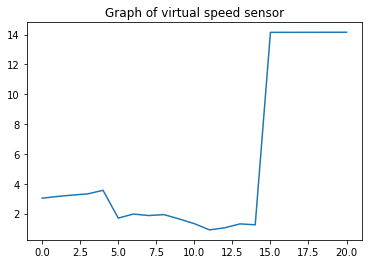

In [70]:
x = range(len(df))
y = df["value"]

(fig, ax) = plt.subplots(1, 1)
ax.plot(x, y)
ax.set_title('Graph of virtual speed sensor')

In [71]:
# End of file